In [7]:
import pandas as pd
import os

In [3]:
## Task #1: Merge the 12 months of sales data into a single CSV file

In [4]:
df = pd.read_csv("H:\Anacnda_22\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_November_2019.csv")

In [5]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,278797,Wired Headphones,1,11.99,11/21/19 09:54,"46 Park St, New York City, NY 10001"
1,278798,USB-C Charging Cable,2,11.95,11/17/19 10:03,"962 Hickory St, Austin, TX 73301"
2,278799,Apple Airpods Headphones,1,150.0,11/19/19 14:56,"464 Cherry St, Los Angeles, CA 90001"
3,278800,27in FHD Monitor,1,149.99,11/25/19 22:24,"649 10th St, Seattle, WA 98101"
4,278801,Bose SoundSport Headphones,1,99.99,11/09/19 13:56,"522 Hill St, Boston, MA 02215"


In [6]:
# Task to merge all months data files in single file for yearly analysis

In [27]:
# Given solution: Creating am empty dataframe and appending another dataframe in which each file is getting added up

file_path= "H:\Anacnda_22\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\\" #double slash at end since single slash makes End of line=> syntax error
files = [file for file in os.listdir(file_path)] # file for file can be written as i for i and need to learn more about this fetching loop

all_months_data = pd.DataFrame()

for i in files:
    print(i)
    df = pd.read_csv(file_path + i) # "\\" Concateneted(with "+") double slash since single slash makes End of line=> syntax error
    all_months_data = pd.concat([all_months_data,df]) # Reason why we passed 2 dataframes as list elements, is we are going to modify the second dataframe df with new file in each loop iteration.

all_months_data.to_csv("Year_data.csv", index=False)  
#all_months_data.head()




Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [28]:
# Read the yearly data in updated data frame

In [29]:
all_data= pd.read_csv("Year_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [ ]:
 # Task 2: Add Month Column  ------> Augment data with additiponal columns

In [30]:
#all_data["Month"] = 
all_data["Order Date"].str[:2]

0          04
1         NaN
2          04
3          04
4          04
         ... 
186845     09
186846     09
186847     09
186848     09
186849     09
Name: Order Date, Length: 186850, dtype: object

In [31]:
all_data["Month"] = all_data["Order Date"].str[:2]

In [32]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [ ]:
# To clean Not Null valued rows or data 

In [33]:
NaN_df = all_data[all_data.isna().any(axis=1)] # .any(axis=1) is used to see all NaN columns, so that they can be removed

In [35]:
NaN_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# To cleanup the NaN rows

In [ ]:
# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)[source]
#  axis{0 or ‘index’, 1 or ‘columns’}, default 0
#  0, or ‘index’ : Drop rows which contain missing values.
#  1, or ‘columns’ : Drop columns which contain missing value.

# how{‘any’, ‘all’}, default ‘any’
# Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.
# ‘any’ : If any NA values are present, drop that row or column.
# ‘all’ : If all values are NA, drop that row or column.

In [36]:
all_data = all_data.dropna(how='all')

In [37]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [ ]:
# If you see above the row with index 1 is removed being NaN, so now we need to reset indices of df to arrange df properly

In [38]:
# to check if there is still any row with all NaN columns or cells
all_data.isna().any(axis=1) # shows if any rows have NaN values; False = no NaN values


0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [39]:
all_data.isna() # all cells in df; False = no NaN values

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
186845,False,False,False,False,False,False,False
186846,False,False,False,False,False,False,False
186847,False,False,False,False,False,False,False
186848,False,False,False,False,False,False,False


In [40]:
all_data.isna().any(axis=0) # shows if any columns have NaN values; False = no NaN values

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
Month               False
dtype: bool

In [42]:
# Reset the indices

all_data = all_data.reset_index(drop='true') #drop: Boolean value, Adds the replaced index column to the data if False.

In [43]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [44]:
# Data type Conversion (date character to Int) (Using .astype)
all_data["Month"] = all_data["Month"].astype('int32')

ValueError: invalid literal for int() with base 10: 'Or'

In [47]:
all_data['Order Date'].str[:2] == 'Or'

0         False
1         False
2         False
3         False
4         False
          ...  
186300    False
186301    False
186302    False
186303    False
186304    False
Name: Order Date, Length: 186305, dtype: bool

In [48]:
#to find and remove 'Or'

all_data[all_data['Order Date'].str[:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [49]:
#  We'll find and rows with "Or" as Order Date start 2 chars or Month value and skip them while copying 
# --> required data back again to same dataframe forming a new data in the same df. 

all_data[all_data['Order Date'].str[:2] != 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [50]:
all_data=all_data[all_data['Order Date'].str[:2] != 'Or']

In [52]:
all_data[all_data['Order Date'].str[:2] == 'Or'] # To check if we have any row with "Or" (valued Month) as Order Date 1st 2 char's

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [54]:
all_data["Month"] = all_data["Month"].astype('int32')

C:\Users\SHAMLI~1.KAL\AppData\Local\Temp/ipykernel_12924/3726929233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data["Month"] = all_data["Month"].astype('int32')


In [55]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [53]:
# Task for which we have added Month column to Df is to: See which month was best for Sales and how much is earned that month

In [56]:
all_data['Tot_Sales_Per_Id'] = all_data["Quantity Ordered"] * all_data["Price Each"]

TypeError: can't multiply sequence by non-int of type 'str'

In [ ]:
## Converting column type to correct type

In [58]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"]) # using to_numeric method of pandas if not sure about proper integer data type for conversion
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

In [59]:
all_data['Tot_Sales_Per_Id'] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [60]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Tot_Sales_Per_Id
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [ ]:
# using groupby function with aggregation
# to get mean, min and max values
#result = df.groupby('Type').agg({'top_speed(mph)': ['mean', 'min', 'max']})

# In our case to simply see the sum of tot_sales by each month we can use: DataFrame.groupby().sum()

In [61]:
Highest_Sale_Month = all_data.groupby("Month").agg({'Tot_Sales_Per_Id':['max']})

In [62]:
Highest_Sale_Month

,Tot_Sales_Per_Id
,max
Month,
1,1999.98
2,1700.00
3,1700.00
4,3400.00
5,3400.00
6,3400.00
7,1700.00
8,1700.00


In [70]:
Monthly_Tot_Sales = all_data.groupby("Month").sum('Tot_Sales_Per_Is')

In [72]:
Monthly_Tot_Sales.head()

,Quantity Ordered,Price Each,Tot_Sales_Per_Id
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75


In [69]:
all_data.groupby("Month").sum('Tot_Sales_Per_Is').max()

Quantity Ordered      28114.00
Price Each          4588415.41
Tot_Sales_Per_Id    4613443.34
dtype: float64

<BarContainer object of 12 artists>

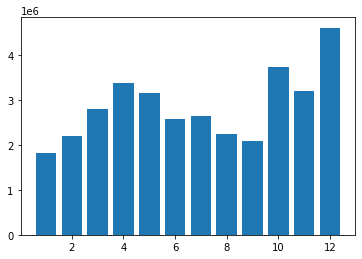

In [74]:
import matplotlib.pyplot as mplt

Months = range(1,13)

mplt.bar(Months,Monthly_Tot_Sales["Tot_Sales_Per_Id"])


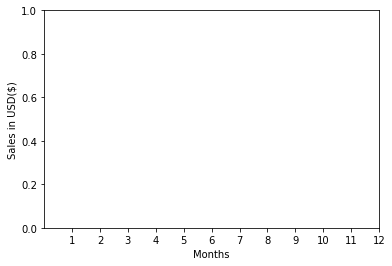

In [75]:
mplt.xticks(Months)
mplt.xlabel("Months")
mplt.ylabel("Sales in USD($)")
mplt.show()

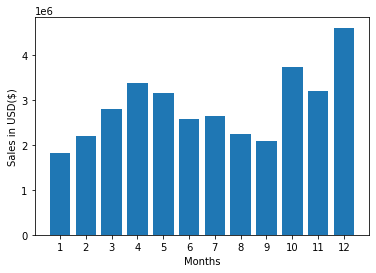

In [76]:
Months = range(1,13)

mplt.bar(Months,Monthly_Tot_Sales["Tot_Sales_Per_Id"])
mplt.xticks(Months)
mplt.xlabel("Months")
mplt.ylabel("Sales in USD($)")
mplt.show()

####  Task 2. Which city has highest no. of sales ?

In [77]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Tot_Sales_Per_Id
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [87]:
all_data["Purchase Address"].str.split(",")

0                    [917 1st St,  Dallas,  TX 75001]
1               [682 Chestnut St,  Boston,  MA 02215]
2            [669 Spruce St,  Los Angeles,  CA 90001]
3            [669 Spruce St,  Los Angeles,  CA 90001]
4               [333 8th St,  Los Angeles,  CA 90001]
                             ...                     
186300     [840 Highland St,  Los Angeles,  CA 90001]
186301    [216 Dogwood St,  San Francisco,  CA 94016]
186302       [220 12th St,  San Francisco,  CA 94016]
186303     [511 Forest St,  San Francisco,  CA 94016]
186304     [250 Meadow St,  San Francisco,  CA 94016]
Name: Purchase Address, Length: 185950, dtype: object

In [88]:
city=all_data["Purchase Address"].str.split(",")

TypeError: astype() missing 1 required positional argument: 'dtype'

In [97]:
all_data["Purchase Address"].apply(lambda x: x.split(',')[1]) 

# (lambda x) is a function that we defined using apply() method, passing argument x.
# x is the content of "Purchase Address" column we selected to apply a function to split and get the 2nd indexed value from.

0                 Dallas
1                 Boston
2            Los Angeles
3            Los Angeles
4            Los Angeles
               ...      
186300       Los Angeles
186301     San Francisco
186302     San Francisco
186303     San Francisco
186304     San Francisco
Name: Purchase Address, Length: 185950, dtype: object

In [ ]:
# Let's use apply to define function (globally) before using it

In [99]:
# We can also use the above defined function as follows by defining it globally and calling it in code:-

def get_city(address):
    return address.split(',')[1]

all_data['City'] = all_data["Purchase Address"].apply(lambda x: get_city(x))


all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Tot_Sales_Per_Id,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles
186301,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco
186302,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco


In [100]:
all_data.groupby('City').sum('Tot_Sales_Per_Id')

,Quantity Ordered,Price Each,Month,Tot_Sales_Per_Id
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Portland,14053,2307747.47,87765,2320490.61
San Francisco,50239,8211461.74,315520,8262203.91
Seattle,16553,2733296.01,104941,2747755.48


In [105]:
Sales_Per_City=all_data.groupby('City').sum('Tot_Sales_Per_Id')
Sales_Per_City.head()

,Quantity Ordered,Price Each,Month,Tot_Sales_Per_Id
City,,,,
Atlanta,16602,2779908.20,104794,2795498.58
Austin,11153,1809873.61,69829,1819581.75
Boston,22528,3637409.77,141112,3661642.01
Dallas,16730,2752627.82,104620,2767975.40
Los Angeles,33289,5421435.23,208325,5452570.80


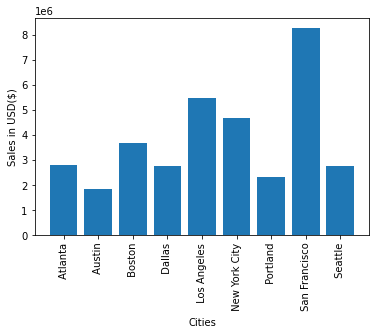

In [110]:
#Cities = all_data['City'].unique() # Here, due to the unique method the ordering of City is different than that of when grouped for total sales

Cities = [i for i, df in all_data.groupby('City')] #So, while mapping, to have same order of grouped cities(x) as per the order of sales_total(y) 
mplt.bar(Cities,Sales_Per_City['Tot_Sales_Per_Id']) # Here, for Y scale the order matters
mplt.xlabel("Cities")
mplt.ylabel("Sales in USD($)")
mplt.xticks(Cities, rotation='vertical')
mplt.show()

In [111]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Tot_Sales_Per_Id,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
